# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Checking my graphics card is available

In [114]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Import all the Dependencies

In [115]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

##### I adjusted the number of classes, since I am going to use 4 classes. 1 additional class for the outlier non_potato images(random images)

In [71]:
IMAGE_SIZE = 256
CHANNELS = 3
n_classes = 4
BATCH_SIZE = 32

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 2148 images belonging to 4 classes.


In [80]:
train_generator.class_indices

{'Non_potato_image': 0,
 'Potato___Early_blight': 1,
 'Potato___Late_blight': 2,
 'Potato___healthy': 3}

In [81]:
class_names = list(train_generator.class_indices.keys())
class_names

['Non_potato_image',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [82]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.22600321 0.22992478 0.20674878]
  [0.22555684 0.2294784  0.20623863]
  [0.22511046 0.22903202 0.20572849]
  ...
  [0.19889735 0.20281892 0.17928949]
  [0.19250976 0.19643132 0.17290191]
  [0.23854308 0.24246465 0.2117989 ]]

 [[0.25027463 0.25419623 0.23458837]
  [0.25040218 0.25432375 0.23471591]
  [0.2505297  0.25445127 0.23484345]
  ...
  [0.1983872  0.20230877 0.17877936]
  [0.19244598 0.19636755 0.17283814]
  [0.23937206 0.24329363 0.21250035]]

 [[0.25335577 0.25727734 0.23766951]
  [0.2515065  0.25542808 0.23582023]
  [0.24965723 0.2535788  0.23397096]
  ...
  [0.19787705 0.20179862 0.17826921]
  [0.19238223 0.1963038  0.17277437]
  [0.24020104 0.24412261 0.21320179]]

 ...

 [[0.14901961 0.14509805 0.13725491]
  [0.14879426 0.1448727  0.13702956]
  [0.14509805 0.14117648 0.13333334]
  ...
  [0.13725491 0.13725491 0.12941177]
  [0.13725491 0.13725491 0.12941177]
  [0.13725491 0.13725491 0.12941177]]

 [[0.14901961 0.14509805 0.13725491]
  [0.1487305  0.14480893 0.1369658 ]


In [83]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 293 images belonging to 4 classes.


In [84]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 513 images belonging to 4 classes.


In [85]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.56674117 0.56281954 0.63340783]
  [0.5628677  0.55894613 0.62953436]
  [0.5482538  0.5443322  0.61492044]
  ...
  [0.43155593 0.41586965 0.47469318]
  [0.44625744 0.43057117 0.4893947 ]
  [0.46095896 0.44527268 0.5040962 ]]

 [[0.5673537  0.56343216 0.6340204 ]
  [0.56348026 0.5595587  0.6301469 ]
  [0.5525417  0.5486201  0.61920834]
  ...
  [0.5128694  0.49718317 0.55600667]
  [0.51593226 0.500246   0.5590695 ]
  [0.51899505 0.5033088  0.5621323 ]]

 [[0.5679663  0.5640447  0.63463295]
  [0.5640928  0.56017125 0.6307595 ]
  [0.55682963 0.55290806 0.6234963 ]
  ...
  [0.50229377 0.4866075  0.545431  ]
  [0.47289076 0.4572045  0.516028  ]
  [0.44348773 0.42780146 0.486625  ]]

 ...

 [[0.72011995 0.7161984  0.77894354]
  [0.7219577  0.7180361  0.7807812 ]
  [0.72379535 0.7198738  0.7826189 ]
  ...
  [0.40977004 0.39800534 0.464672  ]
  [0.5425073  0.5307426  0.59740925]
  [0.53016466 0.51839995 0.5850667 ]]

 [[0.7275736  0.723652   0.7863971 ]
  [0.72818613 0.72426456 0.78700966]


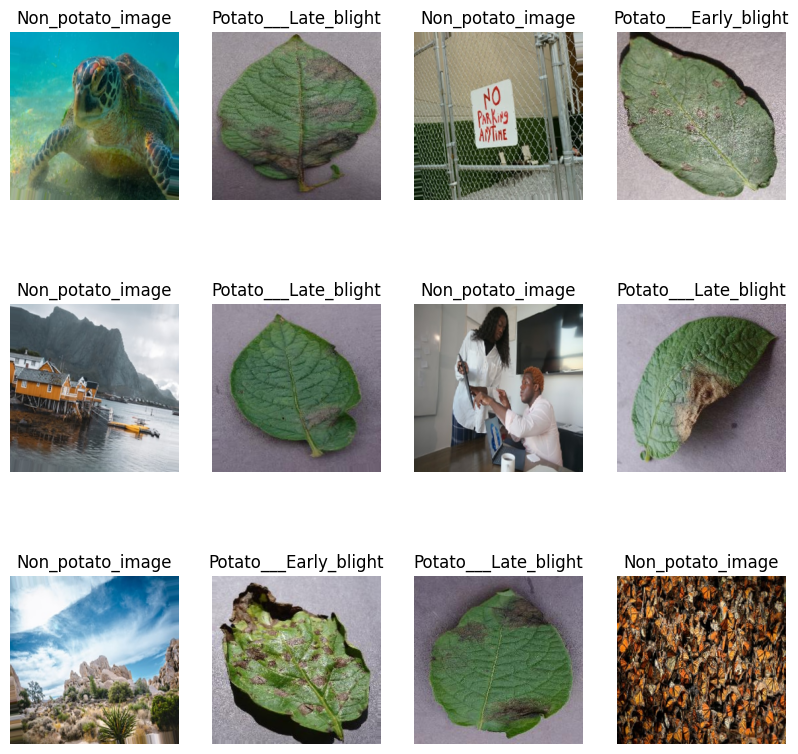

In [88]:
# Get a batch of images and labels from the train generator
image_batch, labels_batch = next(train_generator)

# Display the first 12 images from the batch
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[int(labels_batch[i])])
    plt.axis("off")
plt.show()


## Building the Model

In [91]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4

model = models.Sequential([
    layers.InputLayer(shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [92]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_34 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,812 (718.02 KB)

 Trainable params: 183,812 (718.02 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [93]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [22]:
1506/32

47.0625

In [23]:
215/32

6.71875

In [94]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=30,
)

/home/kecheste/Documents/Internships/iCog/training/CNN-training/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 411ms/step - accuracy: 0.3603 - loss: 1.2898 - val_accuracy: 0.4167 - val_loss: 1.1404
Epoch 2/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - accuracy: 0.5150 - loss: 0.9941

2024-10-22 10:44:53.037603: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
/usr/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-10-22 10:44:53.037640: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.5158 - loss: 0.9984 - val_accuracy: 0.5941 - val_loss: 0.9313
Epoch 3/30


2024-10-22 10:44:53.819912: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:44:53.819969: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 402ms/step - accuracy: 0.6118 - loss: 0.8188 - val_accuracy: 0.7604 - val_loss: 0.5622
Epoch 4/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 335ms/step - accuracy: 0.7647 - loss: 0.6232

2024-10-22 10:45:19.440876: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 155ms/step - accuracy: 0.7739 - loss: 0.6049 - val_accuracy: 0.8119 - val_loss: 0.5197
Epoch 5/30


2024-10-22 10:45:19.881573: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-22 10:45:19.881620: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:45:19.881635: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 399ms/step - accuracy: 0.8121 - loss: 0.4786 - val_accuracy: 0.8073 - val_loss: 0.4571
Epoch 6/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 338ms/step - accuracy: 0.8482 - loss: 0.3704

2024-10-22 10:45:45.439251: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:45:45.439291: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.8531 - loss: 0.3678 - val_accuracy: 0.9010 - val_loss: 0.3102
Epoch 7/30


2024-10-22 10:45:45.897693: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:45:45.897740: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 387ms/step - accuracy: 0.8575 - loss: 0.3742 - val_accuracy: 0.7969 - val_loss: 0.4807
Epoch 8/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.9075 - loss: 0.2772 - val_accuracy: 0.9109 - val_loss: 0.2288
Epoch 9/30


2024-10-22 10:46:11.030272: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:46:11.030350: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 386ms/step - accuracy: 0.9212 - loss: 0.2257 - val_accuracy: 0.9427 - val_loss: 0.1553
Epoch 10/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 321ms/step - accuracy: 0.9398 - loss: 0.1482

2024-10-22 10:46:35.634316: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:46:35.634359: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - accuracy: 0.9405 - loss: 0.1688 - val_accuracy: 0.9604 - val_loss: 0.1734
Epoch 11/30


2024-10-22 10:46:36.064643: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:46:36.064688: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 377ms/step - accuracy: 0.9306 - loss: 0.2217 - val_accuracy: 0.9271 - val_loss: 0.1695
Epoch 12/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - accuracy: 0.9533 - loss: 0.1117

2024-10-22 10:46:59.896818: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:46:59.896855: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.9525 - loss: 0.1187 - val_accuracy: 0.9109 - val_loss: 0.1764
Epoch 13/30


2024-10-22 10:47:00.324303: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:47:00.324336: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 372ms/step - accuracy: 0.9289 - loss: 0.1803 - val_accuracy: 0.9479 - val_loss: 0.1528
Epoch 14/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.9541 - loss: 0.1038

2024-10-22 10:47:23.871765: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:47:23.871802: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.9563 - loss: 0.1121 - val_accuracy: 0.9406 - val_loss: 0.1664
Epoch 15/30


2024-10-22 10:47:24.281818: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 385ms/step - accuracy: 0.9555 - loss: 0.1028 - val_accuracy: 0.9427 - val_loss: 0.1638
Epoch 16/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 317ms/step - accuracy: 0.9797 - loss: 0.0609

2024-10-22 10:47:48.730690: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:47:48.730766: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - accuracy: 0.9786 - loss: 0.0701 - val_accuracy: 0.9307 - val_loss: 0.1310
Epoch 17/30


2024-10-22 10:47:49.143605: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:47:49.143636: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 365ms/step - accuracy: 0.9722 - loss: 0.0744 - val_accuracy: 0.9115 - val_loss: 0.3306
Epoch 18/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - accuracy: 0.9432 - loss: 0.1405

2024-10-22 10:48:12.916795: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:48:12.916831: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.9425 - loss: 0.1439 - val_accuracy: 0.9505 - val_loss: 0.1238
Epoch 19/30


2024-10-22 10:48:13.331409: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 400ms/step - accuracy: 0.9694 - loss: 0.1005 - val_accuracy: 0.9844 - val_loss: 0.0476
Epoch 20/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 340ms/step - accuracy: 0.9639 - loss: 0.0985

2024-10-22 10:48:38.892490: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:48:38.892527: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9674 - loss: 0.0948 - val_accuracy: 0.9802 - val_loss: 0.0639
Epoch 21/30


2024-10-22 10:48:39.311699: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:48:39.311740: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 378ms/step - accuracy: 0.9505 - loss: 0.1472 - val_accuracy: 0.9844 - val_loss: 0.0779
Epoch 22/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.9603 - loss: 0.0989

2024-10-22 10:49:03.581652: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:49:03.581699: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.9666 - loss: 0.0864 - val_accuracy: 0.9505 - val_loss: 0.1402
Epoch 23/30


2024-10-22 10:49:04.048930: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:49:04.048988: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 372ms/step - accuracy: 0.9786 - loss: 0.0712 - val_accuracy: 0.9792 - val_loss: 0.0669
Epoch 24/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.9740 - loss: 0.0793 - val_accuracy: 0.9703 - val_loss: 0.0742
Epoch 25/30


2024-10-22 10:49:28.477108: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:49:28.477158: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 398ms/step - accuracy: 0.9873 - loss: 0.0412 - val_accuracy: 0.9792 - val_loss: 0.0644
Epoch 26/30
20/47 ━━━━━━━━━━━━━━━━━━━━ 8s 329ms/step - accuracy: 0.9768 - loss: 0.0424

2024-10-22 10:49:53.490497: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:49:53.490533: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.9794 - loss: 0.0446 - val_accuracy: 0.9802 - val_loss: 0.0389
Epoch 27/30


2024-10-22 10:49:53.930577: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:49:53.930612: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 394ms/step - accuracy: 0.9899 - loss: 0.0334 - val_accuracy: 0.9896 - val_loss: 0.0278
Epoch 28/30
21/47 ━━━━━━━━━━━━━━━━━━━━ 8s 331ms/step - accuracy: 0.9955 - loss: 0.0216

2024-10-22 10:50:19.054815: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:50:19.054853: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - accuracy: 0.9947 - loss: 0.0245 - val_accuracy: 1.0000 - val_loss: 0.0203
Epoch 29/30


2024-10-22 10:50:19.467671: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:50:19.467709: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 384ms/step - accuracy: 0.9939 - loss: 0.0240 - val_accuracy: 0.9792 - val_loss: 0.0437
Epoch 30/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.9818 - loss: 0.0671 - val_accuracy: 0.9901 - val_loss: 0.0352


2024-10-22 10:50:44.095999: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15617892443903361175
2024-10-22 10:50:44.096046: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 1133998248012794934


In [95]:
scores = model.evaluate(test_generator)

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 361ms/step - accuracy: 0.9804 - loss: 0.0536


In [96]:
scores

[0.059409260749816895, 0.9766082167625427]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [97]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [98]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 47}

In [99]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [100]:
type(history.history['loss'])

list

In [101]:
len(history.history['loss'])

30

In [102]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.2325563430786133,
 1.0018196105957031,
 0.7192933559417725,
 0.5901287794113159,
 0.44380080699920654]

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [104]:
val_acc

[0.4166666567325592,
 0.594059407711029,
 0.7604166865348816,
 0.8118811845779419,
 0.8072916865348816,
 0.9009901285171509,
 0.796875,
 0.9108911156654358,
 0.9427083134651184,
 0.9603960514068604,
 0.9270833134651184,
 0.9108911156654358,
 0.9479166865348816,
 0.9405940771102905,
 0.9427083134651184,
 0.9306930899620056,
 0.9114583134651184,
 0.9504950642585754,
 0.984375,
 0.9801980257034302,
 0.984375,
 0.9504950642585754,
 0.9791666865348816,
 0.9702970385551453,
 0.9791666865348816,
 0.9801980257034302,
 0.9895833134651184,
 1.0,
 0.9791666865348816,
 0.9900990128517151]

In [105]:
acc

[0.38482385873794556,
 0.5163690447807312,
 0.6869918704032898,
 0.78125,
 0.8292682766914368,
 0.8571428656578064,
 0.8672086596488953,
 0.9122023582458496,
 0.9268617033958435,
 0.9409937858581543,
 0.938829779624939,
 0.9518633484840393,
 0.9507978558540344,
 0.9580745100975037,
 0.9593495726585388,
 0.9776785969734192,
 0.9620596170425415,
 0.9419642686843872,
 0.9708672165870667,
 0.9702380895614624,
 0.934959352016449,
 0.9717261791229248,
 0.9701896905899048,
 0.9776785969734192,
 0.9860372543334961,
 0.9813664555549622,
 0.9898374080657959,
 0.9940476417541504,
 0.988696813583374,
 0.9813664555549622]

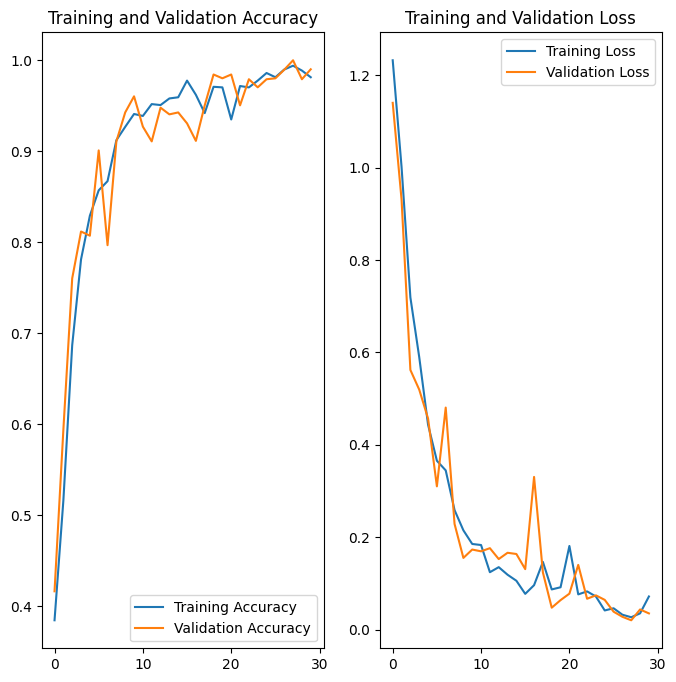

In [106]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict
Actual label: Non_potato_image
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Predicted label: Non_potato_image


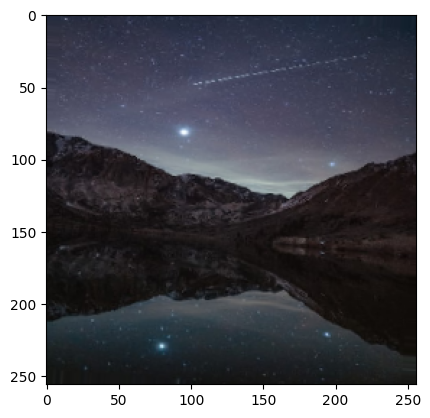

In [107]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [108]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


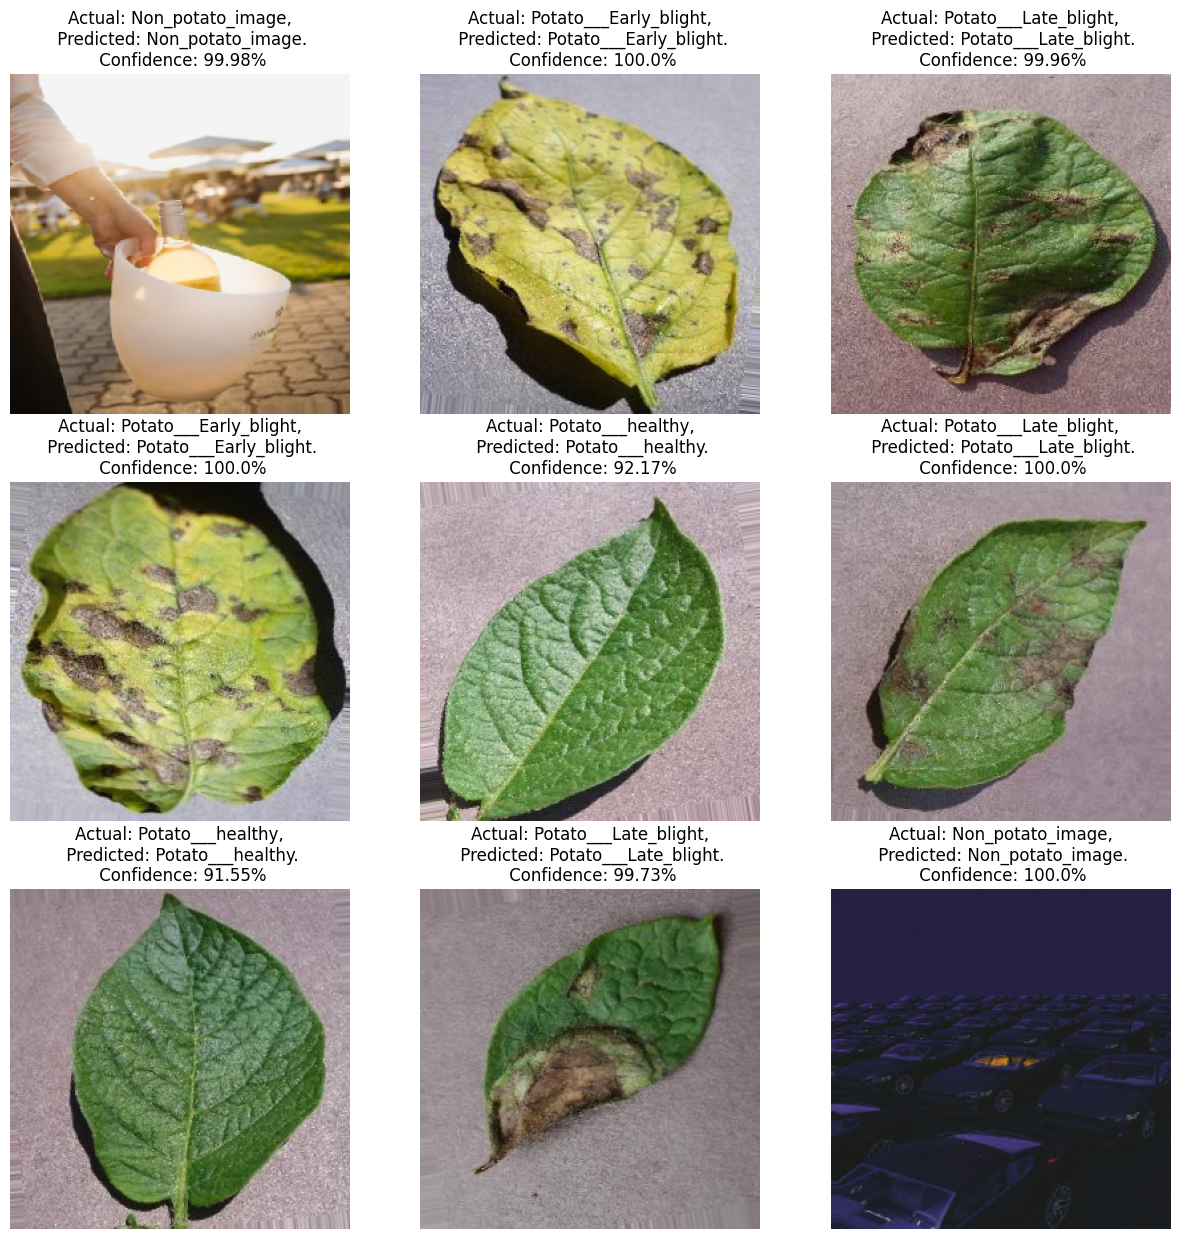

In [109]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [112]:
model.save("../saved-models/add-model.keras")